## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
nbr_rows = df.shape[0]
print('there is', nbr_rows,'rows, no data seems to be missing')

there is 294478 rows, no data seems to be missing


c. The number of unique users in the dataset.

In [5]:
print('there are', df['user_id'].nunique(),'unique users')

there are 290584 unique users


In [6]:
dupp = df['user_id'].shape[0] - df['user_id'].nunique()
print('So there is', dupp,'duplicate lines')

So there is 3894 duplicate lines


d. The proportion of users converted.

In [7]:
# number of converted user
nbrconvuser = df.query('converted == 1')['user_id'].count()
print(nbrconvuser,'users have established a conversion')
# proportion of user converted
prop_conv_user = (nbrconvuser/nbr_rows)*100
print('The proportion of users converted is',prop_conv_user)

35237 users have established a conversion
The proportion of users converted is 11.9659193556


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
# nbr of times new page & treatment don't match
np_0tr = df.query("landing_page == 'new_page' and group != 'treatment'").shape[0]
# nbr of times old page & treatment match
op_tr = df.query("landing_page != 'new_page' and group == 'treatment'").shape[0]

print("Number of times New_page and Treatment don't match :",np_0tr + op_tr)

Number of times New_page and Treatment don't match : 3893


f. Do any of the rows have missing values?

When searching for the number of rows in the dataset, the number of entries was the same in each column.
there were 294478.
We can verify this with the following formula :

In [9]:
df.isnull().shape[0]

294478

The number of entries given at the beginning of the exercise is the same as in the formula, so there is no missing value.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# create 2 dataframe, both corresponding to :
# npt = new landing page with the treatment group
# olc = old landing page with the control group

npt = pd.DataFrame(df)
olc = pd.DataFrame(df)

npt = df.query("landing_page == 'new_page' and group == 'treatment'")
olc = df.query("landing_page == 'old_page' and group == 'control'")

In [11]:
# Create df2 as the concatenate of npt & olc as initiated above

df2 = pd.DataFrame(df)
df2 = pd.concat([npt, olc])
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


a. How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop_duplicates(subset ="user_id", keep = False, inplace = True) 

In [18]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
# df2 total number of rows
df2_r = df2.shape[0]
# df2 total number of individual convertion
df2_total_conv = df2.query('converted == 1').shape[0]

# probability of an individual converting regardless of the page
prop_tot_conv = (df2_total_conv/df2_r)*100
print('There is', prop_tot_conv,'% of users who converted regardless of the page')


There is 11.959749882133504 % of users who converted regardless of the page


b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# df2 control group number of rows
df2_cont = df2.query("group == 'control'").shape[0]

# df2 control group number of individual convertion
df2_control_conv = df2.query("converted == 1 and group == 'control'").shape[0]

# probability of an individual converting from control group
prop_control_conv = (df2_control_conv/df2_cont)
print('There is', prop_control_conv,'% of users who converted regardless of the page')

There is 0.1203863045004612 % of users who converted regardless of the page


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
# df2 control group number of rows
df2_treat = df2.query("group == 'treatment'").shape[0]

# df2 treatment group number of individual convertion
df2_treat_conv = df2.query("converted == 1 and group == 'treatment'").shape[0]

# probability of an individual converting from treatment group
prop_treat_conv = (df2_treat_conv/df2_treat)
print('There is', prop_treat_conv,'% of users who converted regardless of the page')

There is 0.11880888313869065 % of users who converted regardless of the page


d. What is the probability that an individual received the new page?

In [22]:
# df2 control group number of rows
df2_page = df2.shape[0]

# df2 number of new page
df2_new_lp = df2.query("landing_page == 'new_page'").shape[0]

# df2 number of old page

# probability of an individual converting from control group
prop_new_lp = (df2_new_lp/df2_page)*100
print('There is', prop_new_lp,'% of chance that an user received the new page')

There is 50.00602237570677 % of chance that an user received the new page


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Looking at the observed results we notice that the new and old landing page are almost equally distributed.
According to the conversions of each redirections the new landing page does not obtain better results than the old one.
However, beyond the conversion ratio, we lack a lot of information to determine if the new landing page is really less efficient.
So some users may be used to and have more confidence in the old interface, for example.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**Null Hypotesis :**
The new landing page is equal or worse than the old one

    - Pnew - Pold <= 0

**Alternative Hypothesis :** 
The new landing page is better than the old one.

    - Pnew - Pold > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


In [24]:
p_new = df2['converted'].mean()
p_new

0.11959749882133504

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = df2['converted'].mean()
p_old

0.11959749882133504

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = df2.query("group == 'treatment'").shape[0]
n_new

145309

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.binomial(1, p_new, n_new).mean()
new_page_converted

0.11990998492866925

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(1, p_new, n_new).mean()
old_page_converted

0.11911168613093477

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted - old_page_converted

0.00079829879773447854

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diff = []
for _ in range (10000):
    new_page_converted = np.random.binomial(1, p_new, n_new).mean()
    old_page_converted = np.random.binomial(1, p_new, n_new).mean()
    p_diff.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

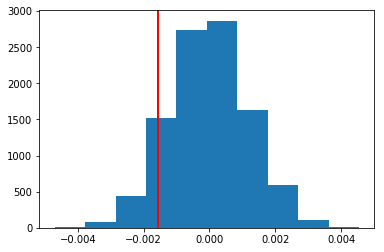

In [32]:
obs_diff = prop_treat_conv - prop_control_conv
plt.hist(p_diff);
plt.axvline(obs_diff, color='red', linewidth=2);
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
(np.array(p_diff) > obs_diff).mean()

0.90759999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We compute the p_value, the closer our p_value is to 1 as it is the case here the less the alternative hypothesis should be retained.

In our case, with a p_value of 0.9, we fail to reject the null hypothesis, the alternative hypothesis of keeping the new landing page doesn't have a better convertion rate than the old one on a large sampling distribution. 
We should continue to run the old one.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


In [35]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'")['user_id'].nunique()
n_new = df2.query("landing_page == 'new_page'")['user_id'].nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
zscore, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print('The Z_score is',zscore)
print('The P_value is',pval)

The Z_score is -1.31024085793
The P_value is 0.904942816116


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

With a P_value of 0.9 it does confirms the findings in part j. and k. that there was no statistical difference in the conversions between the old and the new landing page.
Again we fail to reject the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since each row is either a conversion or not, we only have 2 outcomes possible, which falls within the scope of logistical regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [38]:
df2['intercept'] = 1
df2[['treatment', 'ab_page']] = pd.get_dummies(df2['group'])

In [39]:
df2 = df2.drop('treatment', axis=1)

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290583 entries, 2 to 294476
Data columns (total 7 columns):
user_id         290583 non-null int64
timestamp       290583 non-null object
group           290583 non-null object
landing_page    290583 non-null object
converted       290583 non-null int64
intercept       290583 non-null int64
ab_page         290583 non-null uint8
dtypes: int64(3), object(3), uint8(1)
memory usage: 15.8+ MB


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [42]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

lr = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = lr.fit()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:               8.068e-06
Time:                        18:41:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1901
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.310      0.190      -0.037       0.007
==============================================================================
"""

In [44]:
print('The exp of ab_page is :',np.exp(-0.0150))

print("Since the exponential is <1 it's often useful to compute the reciprocal as so :")
print('The reciproqual is :', 1/np.exp(-0.0150))

The exp of ab_page is : 0.985111939603
Since the exponential is <1 it's often useful to compute the reciprocal as so :
The reciproqual is : 1.01511306462


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The P_value associated with ab_page is 0.19 .
Unlike the second part where the null hypothesis where the old landing page should be better or equal to the new one here we're trying to figure out if a parameter equal or not 0.

The reciproqual exp of ab_page means that's The old page user, if everything else is kept constant, has 1.015 more chances on average to convert than the new page user.
Again we fail to reject the null hypothesis


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In our regression model, we did not have the possibility to use the timestamp column, this could have helped us to know for example how long each group was tested, if the test took place during a short period of time, in this case our model could have been affected by aversion to change or novelty effect.

We could add other factors to our model in order to obtain better forecasts, but we risk exposing our model to several potential problems such as multicollinearity or higher-order terms that could mislead our assumption, although there are ways to get rid of these problems.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
df3 = pd.read_csv('countries.csv')
df3 = pd.merge(df3, df2, on='user_id', how='inner')
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [46]:
df3['country'].value_counts()

US    203618
UK     72466
CA     14499
Name: country, dtype: int64

In [47]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290583 entries, 0 to 290582
Data columns (total 11 columns):
user_id         290583 non-null int64
country         290583 non-null object
timestamp       290583 non-null object
group           290583 non-null object
landing_page    290583 non-null object
converted       290583 non-null int64
intercept       290583 non-null int64
ab_page         290583 non-null uint8
CA              290583 non-null uint8
UK              290583 non-null uint8
US              290583 non-null uint8
dtypes: int64(3), object(4), uint8(4)
memory usage: 18.8+ MB


In [49]:
lm = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:               1.520e-05
Time:                        18:41:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.745      0.456      -0.016       0.036
==============================================================================
"""

In [50]:
print('UK user are',np.exp(0.0099),'more likely to convert than US user')

UK user are 1.00994916712 more likely to convert than US user


In [51]:
print('CA user are',1/np.exp(-0.0408),'less likely to convert than US user')

CA user are 1.04164375596 less likely to convert than US user


However according to their p_value > 0.05 it's not statistically significant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [57]:
df3['country_page'] = df3['landing_page']+ '_' + df3['country']
df3.head(3)

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,country_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,old_page_UK
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,new_page_US
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,new_page_UK


In [61]:
df3[['new_page_CA','new_page_UK','new_page_US','old_page_CA','old_page_UK','old_page_US']] = pd.get_dummies(df3['country_page'])
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,country_page,old_page_CA,old_page_UK,old_page_US,new_page_CA,new_page_UK,new_page_US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,old_page_UK,0,1,0,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,new_page_US,0,0,0,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,new_page_UK,0,0,0,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,old_page_UK,0,1,0,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,new_page_UK,0,0,0,0,1,0


In [62]:
lm = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK', 'new_page_CA', 'new_page_UK']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:               2.417e-05
Time:                        19:09:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2730
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA             -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK              0.0045      0.018      0.257      0.797      -0.030       0.039
new_page_CA    -0.0674      0.052     -1.297      0.195      -0.169       0.034
new_page_UK     0.0108      0.023      0.475      0.635      -0.034       0.056
===============================================================================
"""

In [63]:
# UK
np.exp(0.0045), np.exp(0.0108)

(1.0045101402046013, 1.010858530520097)

In [64]:
# CA
1/np.exp(-0.0073), 1/np.exp(-0.0674)

(1.0073267099546657, 1.0697232819209153)

CA user getting the new page are 1.07 less likely to convert than US user getting the new landing page.

UK user getting the new page are 1.01 more likely to convert than US user getting the new landing page.

Due to their P_value > 0.05 it's not statiscally significant 

<a id='conclusions'></a>
## Conclusion

after cleaning up, exploring the data and defining our hypotheses as follows:

We tried to reject the null hypothesis by all means however we failed.
It turned out that the old landing page after several test allows to convert at least equally with the new landing page.

If we fail to reject the null hypothesis, we advise to keep the old landing page because no statistical study conducted allows us to say that the new landing page in terms of conversion is more efficient than the old one.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])